In [42]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations
from ast import literal_eval

In [43]:
import csv
import networkx as nx
from itertools import combinations
rows = []
# 開啟 CSV 檔案
with open("1_N_Actor_E_Director.csv", newline='', encoding='utf-8') as csvfile:

  # 讀取 CSV 檔案內容
    rows = csv.reader(csvfile)

  # 以迴圈輸出每一列
    for row in rows:
        continue
        print(row)
    


In [44]:
df = pd.read_csv('1_N_Actor_E_Director.csv', low_memory=False)
df.head()

,Unnamed: 0,director_name,release_year,actor_list
0,0,\tCheung Chi-Sing,2002.0,"('Anthony Wong', 'Gillian Chung', 'Lam Suet', ..."
1,1,\tHuang Jian-Zhong,2004.0,"('Tao Zeru',)"
2,2,\tHuang Jian-Zhong,2005.0,"('Gu Yang', 'Natalie Meng Yao', 'Wang Qingxian..."
3,3,\tZhang Jing,2005.0,"('Cao Cui-Fen', 'Jiang Qinqin', 'Li Hai-Tao', ..."
4,4,\tZhang Jing,2006.0,"('Jiaxuan Li', 'Tang Wei', 'Tian Yu')"


In [45]:
# make author_list column from string type to tuple
df['actor_list'] = [literal_eval(x) for x in df['actor_list']]

In [46]:
#df = df[df["release_year"]>=2012]

In [47]:
df

,Unnamed: 0,director_name,release_year,actor_list
0,0,\tCheung Chi-Sing,2002.0,"(Anthony Wong, Gillian Chung, Lam Suet, Ruby W..."
1,1,\tHuang Jian-Zhong,2004.0,"(Tao Zeru,)"
2,2,\tHuang Jian-Zhong,2005.0,"(Gu Yang, Natalie Meng Yao, Wang Qingxiang, Wa..."
3,3,\tZhang Jing,2005.0,"(Cao Cui-Fen, Jiang Qinqin, Li Hai-Tao, Zhang ..."
4,4,\tZhang Jing,2006.0,"(Jiaxuan Li, Tang Wei, Tian Yu)"
5,5,\tZhang Jing,2008.0,"(He Mei-Tian, Kenny Kwan, Law Kar-Ying, Zhang ..."
6,6,Faris Kermani,2011.0,()
7,7,Faris Kermani,2013.0,"(Lucy Briers,)"
8,8,Anna van Keimpema,2010.0,"(Johnny de Mol, Lidewij Mahler)"
9,9,Anna van Keimpema,2013.0,"(Aiko Beemsterboer,)"


In [48]:
actor_list = list(df['actor_list'])
actor_list

[('Anthony Wong', 'Gillian Chung', 'Lam Suet', 'Ruby Wong', 'Sam Lee'),
 ('Tao Zeru',),
 ('Gu Yang', 'Natalie Meng Yao', 'Wang Qingxiang', 'Wang Tonghui'),
 ('Cao Cui-Fen', 'Jiang Qinqin', 'Li Hai-Tao', 'Zhang Jingchu'),
 ('Jiaxuan Li', 'Tang Wei', 'Tian Yu'),
 ('He Mei-Tian', 'Kenny Kwan', 'Law Kar-Ying', 'Zhang Meng'),
 (),
 ('Lucy Briers',),
 ('Johnny de Mol', 'Lidewij Mahler'),
 ('Aiko Beemsterboer',),
 ('Charlotte Rampling',
  'Eddie Marsan',
  'Gabriel Byrne',
  'Hayley Atwell',
  'Jodhi May'),
 ('Adrian Duffy', 'Derren Brown', 'Marc Cass', 'Peter Clifford'),
 ('Angie Everhart',),
 ('Claudia Gerini',
  'Elisa Sednaoui',
  'Fabrizio Gifuni',
  'Silvia Calderoni',
  'Vincent Gallo'),
 ('Matilda Grahn', 'Teodor Runsiö', 'Tomas Norström'),
 ('Chien Te-men', 'Lin Mei-Chao', 'Tender Huang', 'Tieh Meng-Chiu'),
 ('Aurélien Wiik',
  'Grégoire Leprince-Ringuet',
  'Saïd Taghmaoui',
  'Thierry Frémont'),
 ('Hwang Chansung', 'Lee Kwang-Soo', 'Song Sae-byeok', 'Yoon Sang-hyun'),
 ('Jo Jae-yoo

In [49]:
edges_list = []
for i in actor_list:
    comb = combinations(i, 2)
    for j in list(comb): 
        edges_list.append(j)
edges_list

[('Anthony Wong', 'Gillian Chung'),
 ('Anthony Wong', 'Lam Suet'),
 ('Anthony Wong', 'Ruby Wong'),
 ('Anthony Wong', 'Sam Lee'),
 ('Gillian Chung', 'Lam Suet'),
 ('Gillian Chung', 'Ruby Wong'),
 ('Gillian Chung', 'Sam Lee'),
 ('Lam Suet', 'Ruby Wong'),
 ('Lam Suet', 'Sam Lee'),
 ('Ruby Wong', 'Sam Lee'),
 ('Gu Yang', 'Natalie Meng Yao'),
 ('Gu Yang', 'Wang Qingxiang'),
 ('Gu Yang', 'Wang Tonghui'),
 ('Natalie Meng Yao', 'Wang Qingxiang'),
 ('Natalie Meng Yao', 'Wang Tonghui'),
 ('Wang Qingxiang', 'Wang Tonghui'),
 ('Cao Cui-Fen', 'Jiang Qinqin'),
 ('Cao Cui-Fen', 'Li Hai-Tao'),
 ('Cao Cui-Fen', 'Zhang Jingchu'),
 ('Jiang Qinqin', 'Li Hai-Tao'),
 ('Jiang Qinqin', 'Zhang Jingchu'),
 ('Li Hai-Tao', 'Zhang Jingchu'),
 ('Jiaxuan Li', 'Tang Wei'),
 ('Jiaxuan Li', 'Tian Yu'),
 ('Tang Wei', 'Tian Yu'),
 ('He Mei-Tian', 'Kenny Kwan'),
 ('He Mei-Tian', 'Law Kar-Ying'),
 ('He Mei-Tian', 'Zhang Meng'),
 ('Kenny Kwan', 'Law Kar-Ying'),
 ('Kenny Kwan', 'Zhang Meng'),
 ('Law Kar-Ying', 'Zhang Meng'),

In [50]:
nodes = dict()
for a1, a2 in edges_list:
    if "" == a1 or ""==a2:
        print("space!!!!")
    if a1 not in nodes:
        nodes[a1] = {a2}
    else: 
        nodes[a1].add(a2)
    
    if a2 not in nodes:
        nodes[a2] = {a1}
    else: 
        nodes[a2].add(a1)

In [51]:
len(nodes)

146379

In [52]:
print(nodes["Kwon Hae-hyo"])

{'Kwon Hae-hyo', 'Ko So-Young', 'Lee Sung-jae', 'Lee Jung-hyun', 'Uhm Jung-hwa', 'Lee Jung-jae', 'Hwang Seok-jeong', 'Yoo Ji-tae', 'Oh Jung-se', 'Shahira Fahmy', 'Chang Mi-hee', 'Kang Dong-won', 'Kim Min-jong', 'Jung Jae-young', 'Lee Hyo-je', 'Hyun Woo', 'Shin Eun-Kyung', 'Kim Sae-byuk', 'Park Hee-von', 'Isabelle Huppert', 'Joo Hyun', 'Kim Min-hee', 'Seo Young-hwa', 'Jeong Seong-hwa', 'Lee Young-ae', 'Shin Eun-soo', 'Kim Hee-won', 'Lee Da-wit', 'Yang Ik-joon', 'Song Seon-mi', 'Jo Yoon-hee', 'Lee Kyoung-young', 'Lee Si-young', 'Park Hyo-Joo', 'Moon So-ri', 'Lee Mu-hyeon', 'Jung Jin-young', 'Jo Min-soo', 'Uhm Ki-Joon', 'Kim Do-Young', 'Hang-Seon Jang'}


In [53]:
nodes["Trey Smith"]

{'Trey Smith'}

In [54]:
# 清掉 graph 中的 self loop
# 並清除清除之後為空的node

del_list = []
for node, val in nodes.items():
    if node in val:
        if len(val)==1:
            nodes[node].remove(node)
            del_list.append(node)
        else:nodes[node].remove(node)
        
for item in del_list:
    del nodes[item]

In [55]:
# 檢查是否還有 self loop
for node, val in nodes.items():
    if node in val:
        print(node)
    if len(val)==0:
        print(node, len(val))

In [56]:
#total edge numbers
count = 0
for node, val in nodes.items():
    count += len(val)
count 

1282370

In [57]:
# 創建轉換表 tran
tran = dict()
for i, item in enumerate(nodes.items()):
    # item[0] to i
    tran[i] = item[0]
    tran[item[0]] = i


In [58]:
tran

{0: 'Anthony Wong',
 'Anthony Wong': 0,
 1: 'Gillian Chung',
 'Gillian Chung': 1,
 2: 'Lam Suet',
 'Lam Suet': 2,
 3: 'Ruby Wong',
 'Ruby Wong': 3,
 4: 'Sam Lee',
 'Sam Lee': 4,
 5: 'Gu Yang',
 'Gu Yang': 5,
 6: 'Natalie Meng Yao',
 'Natalie Meng Yao': 6,
 7: 'Wang Qingxiang',
 'Wang Qingxiang': 7,
 8: 'Wang Tonghui',
 'Wang Tonghui': 8,
 9: 'Cao Cui-Fen',
 'Cao Cui-Fen': 9,
 10: 'Jiang Qinqin',
 'Jiang Qinqin': 10,
 11: 'Li Hai-Tao',
 'Li Hai-Tao': 11,
 12: 'Zhang Jingchu',
 'Zhang Jingchu': 12,
 13: 'Jiaxuan Li',
 'Jiaxuan Li': 13,
 14: 'Tang Wei',
 'Tang Wei': 14,
 15: 'Tian Yu',
 'Tian Yu': 15,
 16: 'He Mei-Tian',
 'He Mei-Tian': 16,
 17: 'Kenny Kwan',
 'Kenny Kwan': 17,
 18: 'Law Kar-Ying',
 'Law Kar-Ying': 18,
 19: 'Zhang Meng',
 'Zhang Meng': 19,
 20: 'Johnny de Mol',
 'Johnny de Mol': 20,
 21: 'Lidewij Mahler',
 'Lidewij Mahler': 21,
 22: 'Charlotte Rampling',
 'Charlotte Rampling': 22,
 23: 'Eddie Marsan',
 'Eddie Marsan': 23,
 24: 'Gabriel Byrne',
 'Gabriel Byrne': 24,
 25: '

In [59]:
# 將nodes變為轉換過代號後的版本
trans_nodes = dict()
for node, outnodes in nodes.items():
    trans_nodes[tran[node]] = [tran[n] for n in outnodes]
trans_nodes

{0: [37813,
  34126,
  110784,
  43537,
  76699,
  16934,
  8116,
  20698,
  52166,
  92489,
  143169,
  20403,
  90777,
  115316,
  48088,
  67842,
  5758,
  9593,
  33072,
  13755,
  43551,
  13759,
  16758,
  1342,
  16052,
  13775,
  16049,
  75575,
  43543,
  1,
  57565,
  69075,
  26834,
  67847,
  48132,
  20553,
  23862,
  25261,
  67829,
  34090,
  16046,
  34083,
  13750,
  5757,
  33053,
  33049,
  33051,
  67830,
  5622,
  3408,
  2,
  47682,
  3212,
  67832,
  13749,
  13763,
  67840,
  99174,
  16050,
  15245,
  10810,
  34403,
  43469,
  13408,
  39373,
  13762,
  13751,
  61149,
  30403,
  3404,
  6801,
  138145,
  13747,
  2703,
  13753,
  2697,
  63030,
  13761,
  34405,
  5617,
  67839,
  10805,
  68894,
  90961,
  37806,
  25269,
  48213,
  25260,
  22042,
  92488,
  67824,
  67856,
  23870,
  22050,
  67846,
  13740,
  23861,
  28906,
  9594,
  5628,
  21350,
  9334,
  99175,
  4047,
  26837,
  13758,
  13752,
  13774,
  99166,
  34115,
  10398,
  28905,
  4294,
  

In [60]:
# checking the pyspark kernel is available

import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

df = spark.sql("select 'spark' as hello ")
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [61]:
# setting and import
###############################################################################
#   pandas:用於展示RDD、numpy:使用argmin等函數進行 minhashing的正確性檢查     #
###############################################################################
from pyspark import SparkConf, SparkContext
import time
import numpy as np
import pandas as pd

In [62]:
nodes[tran[1]]

{'Andy Lau',
 'Anita Yuen',
 'Annie Liu',
 'Annie Yi',
 'Anthony Wong',
 'Athena Chu',
 'Candice Yu On-On',
 'Carina Lau',
 'Carl Ng',
 'Cecilia Cheung',
 'Chapman To',
 'Charlene Choi',
 'Chau Pak-Ho',
 'Chet Lam',
 'Chun Du',
 'Daniel Wu',
 'Debbie Goh',
 'Donnie Yen',
 'Eason Chan',
 'Edison Chen',
 'Ekin Cheng',
 'Eric Tsang',
 'Gao Hu',
 'Ge You',
 'Gigi Leung',
 'Gordon Lam Ka-Tung',
 'Han Geng',
 'Huang Wei De',
 'Irene Wan',
 'Isabella Leong',
 'Jackie Chan',
 'Jacky Heung',
 'Jiang Wu',
 'Jojo Goh',
 'Jordan Chan',
 'Josie Ho',
 'Julian Cheung',
 'Juno Mak',
 'Kara Hui',
 'Karen Mok',
 'Kenny Kwan',
 'Kim-Fai Che',
 'Lam Suet',
 'Lam Tze-Chung',
 'Lik-Sun Fong',
 'Lo Meng',
 'Louis Koo',
 'Maggie Shiu',
 'Michael Wong',
 'Michelle Wai',
 'Nicholas Tse',
 'Nick Cheung',
 'Niki Chow',
 'Patrick Tam',
 'Patrick Tse Yin',
 'Philip Keung',
 'Raymond Wong Ho-Yin',
 'Ronald Cheng',
 'Ruby Wong',
 'Sam Lee',
 'Sammo Hung',
 'Seli Xian',
 'Shaun Tam',
 'Shawn Yue',
 'Simon Yam',
 'Song

In [69]:
# 創建 data stream
# type: (tran(node_name), (q_i, r_i, (d_i,outlink)))


eps = 0.0001
Beta = 0.95




def push_map(item):
    if item[1][0]/item[1][2][0] <= eps:
        return [item]
    else:
        # 1. 先放進修改後的自己
        ret_list = [(item[0],(0.5*Beta*item[1][0],item[1][1]+(1-Beta)*item[1][0] ,item[1][2]))]
        # 2. 將散佈的值加入return list
        for outN in item[1][2][1]:
            ret_list.append((outN,(0.5*Beta*item[1][0]/item[1][2][0])))
        return ret_list
    
    
def push_reduce(x,y):
    if isinstance(x,float) and isinstance(y,float):
        return (x+y)
    elif ~isinstance(x,float) and isinstance(y,float):
        return (x[0]+y, x[1], x[2])
    elif isinstance(x,float) and ~isinstance(y,float):
        return (y[0]+x, y[1], y[2])
    else: return
    


In [70]:
conf = SparkConf().setMaster("local").setAppName("pussycat")
sc = SparkContext.getOrCreate()
origin_nodes = sc.parallelize(trans_nodes.items())
#origin_nodes.map(coldstart)

In [71]:
len(nodes)

146355

In [72]:
#####################################################################
# 找出有興趣的起始點(此處隨機選擇)，並存在interests中               #
#####################################################################
interests = [int(len(nodes)/7*i) for i in range(7)]
PPR = [None for i in range(len(interests))]


In [73]:
#####################################################################
# 進行方才演算法的iterations                                        #
#####################################################################
for inst_idx, interest in enumerate(interests):
    
    
    def coldstart(item, interest=interest):
        if item[0]!=interest:
            return (item[0],( 0.0, 0.0, (len(item[1]), item[1])))
        else:
            return (item[0],( 1.0, 0.0, (len(item[1]), item[1])))

    lines = origin_nodes.map(coldstart)

    max_ = 100
    max_item = None
    iter_count = 0
    increasing_count = 0
    
    while max_>eps and iter_count<50 and increasing_count<2:
        if iter_count == 10:
            res = lines.map(lambda x:(x[0],x[1][1])).collect()
            if len([i for i in res if i[1]>0])<50:
                print("reach 10 iters and found ", len([i for i in res if i[1]>0])," nodes in")
                break
        iter_count += 1
        lines = lines.flatMap(push_map).reduceByKey(push_reduce)
        max_item = lines.max(lambda x:x[1][0]/x[1][2][0])
        
        if max_ < max_item[1][0]/max_item[1][2][0]:
            increasing_count += 1
        max_ = max_item[1][0]/max_item[1][2][0]
        #res = lines.map(lambda x:(x[0],x[1][1])).collect()#
        print("after ", iter_count, " iterations, max:q/d = ", max_)#, "# of nodes >0: ",len([i for i in res if i[1]>0]))
    res = lines.map(lambda x:(x[0],x[1][1])).collect()
    PPR[inst_idx] = [item for item in res if item[1]>0]
    print("end the ", inst_idx, " th PPR approx., ",len([i for i in res if i[1]>0]), " nodes have r > 0 in total")
    print("=========================================")
    


after  1  iterations, max:q/d =  0.0025132275132275133
after  2  iterations, max:q/d =  0.0012430104668859892
after  3  iterations, max:q/d =  0.0007848586874352748
after  4  iterations, max:q/d =  0.0006180046914967984
after  5  iterations, max:q/d =  0.00044773682138168886
after  6  iterations, max:q/d =  0.00031577897244047993
after  7  iterations, max:q/d =  0.00023506264302446968
after  8  iterations, max:q/d =  0.0001488730072488308
after  9  iterations, max:q/d =  0.0001051059079014317
after  10  iterations, max:q/d =  9.998646479744344e-05
end the  0  th PPR approx.,  166  nodes have r > 0 in total
after  1  iterations, max:q/d =  0.0067857142857142855
after  2  iterations, max:q/d =  0.0033979613585541084
after  3  iterations, max:q/d =  0.0018069065924056244
after  4  iterations, max:q/d =  0.001241503881499145
after  5  iterations, max:q/d =  0.0009186985340531005
after  6  iterations, max:q/d =  0.0006641950496844724
after  7  iterations, max:q/d =  0.0004743857333355707
af

after  35  iterations, max:q/d =  0.0007980633328669164
after  36  iterations, max:q/d =  0.0007399199502702601
after  37  iterations, max:q/d =  0.0006861838054829978
after  38  iterations, max:q/d =  0.0006361240597026504
after  39  iterations, max:q/d =  0.0005901633029070461
after  40  iterations, max:q/d =  0.0005475858787730797
after  41  iterations, max:q/d =  0.0005080117605156443
after  42  iterations, max:q/d =  0.00047142321704984484
after  43  iterations, max:q/d =  0.00043761678692636206
after  44  iterations, max:q/d =  0.00040638637960411416
after  45  iterations, max:q/d =  0.00037731449100405405
after  46  iterations, max:q/d =  0.00035022964793831614
after  47  iterations, max:q/d =  0.0003253555827197173
after  48  iterations, max:q/d =  0.00030262083903676853
after  49  iterations, max:q/d =  0.00028105889036690227
after  50  iterations, max:q/d =  0.0002634208130712146
end the  6  th PPR approx.,  105  nodes have r > 0 in total


In [74]:
PPR_sorted = [None for i in range(len(PPR))]
 
for inst_idx, PPR_i in enumerate(PPR):
    PPR_sorted[inst_idx] = [i[0] for i in sorted(PPR_i, reverse=True, key=lambda x:x[1])]

In [75]:
PPR_sorted

[[0,
  28904,
  8116,
  28906,
  13757,
  52163,
  13755,
  92488,
  92489,
  2697,
  52166,
  2703,
  13738,
  28907,
  43603,
  67831,
  47124,
  138145,
  1344,
  67829,
  67830,
  28905,
  48088,
  25266,
  67839,
  48187,
  20698,
  143163,
  43046,
  90777,
  67832,
  34407,
  43474,
  42828,
  99175,
  99174,
  13750,
  13754,
  57565,
  67840,
  110784,
  1343,
  22042,
  143169,
  34225,
  37806,
  13831,
  10399,
  61149,
  48132,
  67844,
  67845,
  67842,
  67843,
  49262,
  140701,
  76699,
  48127,
  67846,
  49261,
  75575,
  43537,
  13746,
  37561,
  43543,
  2696,
  67824,
  67847,
  67856,
  127633,
  16046,
  91939,
  43551,
  13760,
  99166,
  78358,
  90961,
  115316,
  67841,
  23880,
  13747,
  48213,
  30403,
  25269,
  10810,
  13740,
  20403,
  34403,
  38089,
  67816,
  3202,
  48699,
  13752,
  13745,
  3,
  13756,
  37813,
  21350,
  13762,
  57566,
  67833,
  78902,
  13759,
  13751,
  25260,
  13758,
  34115,
  25261,
  68894,
  3404,
  13776,
  43469,
 

In [111]:
vol = [None for i in range(len(PPR_sorted))]
cut = [None for i in range(len(PPR_sorted))]
# the cluster for now is ppr_nodes[:i]
for inst_idx, ppr_nodes in enumerate(PPR_sorted):
    vol[inst_idx] = [len(trans_nodes[ppr_nodes[0]])]
    cut[inst_idx] = [len(trans_nodes[ppr_nodes[0]])]
    
    for i_node in range(1,len(ppr_nodes)):
        vol[inst_idx].append(vol[inst_idx][i_node-1] + len(trans_nodes[ppr_nodes[i_node]]))
        cut[inst_idx].append(  cut[inst_idx][i_node-1] \
                             + len(trans_nodes[ppr_nodes[i_node]]) \
                             - 2*(len([i for i in trans_nodes[ppr_nodes[i_node]] if i in ppr_nodes[:i_node]])) \
                            )


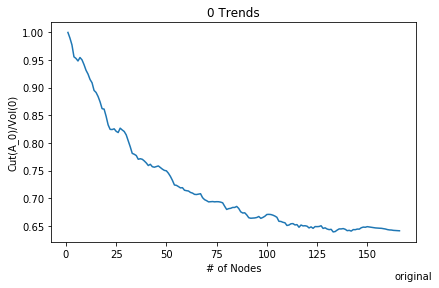

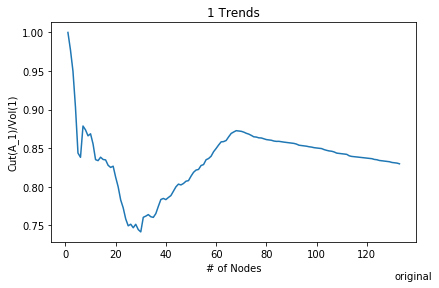

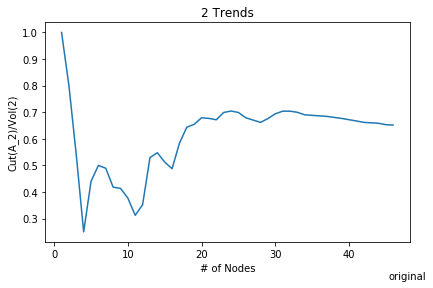

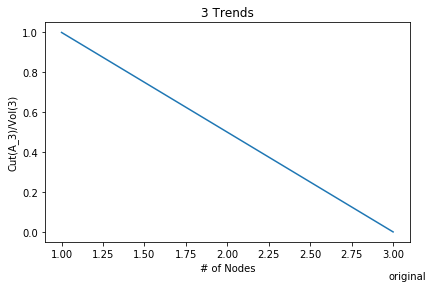

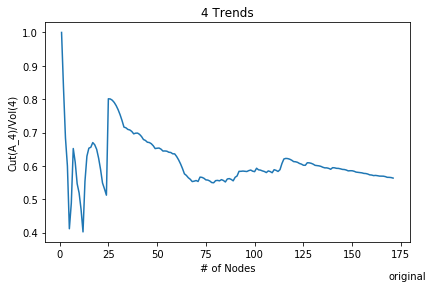

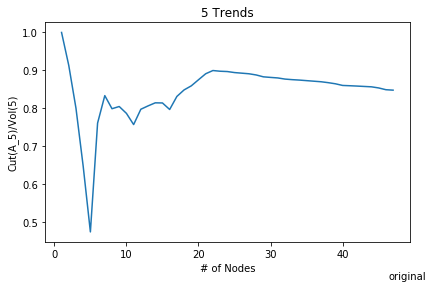

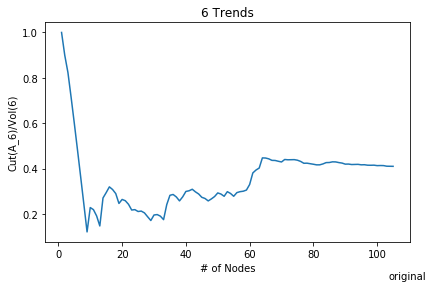

In [113]:
for inst_idx in range(len(PPR_sorted)):
    # 標題與軸標籤
    plt.title(str(inst_idx)+' Trends')
    plt.xlabel('# of Nodes')
    plt.ylabel('Cut(A_'+str(inst_idx)+')/Vol('+str(inst_idx)+')')
    plt.figtext(0.995, 0.01, 'original', ha='right', va='bottom')
    # 避免被圖表元素被蓋住
    plt.tight_layout()
    plt.plot(range(1,1+len(PPR_sorted[inst_idx])), [cut[inst_idx][i]/vol[inst_idx][i] for i in range(len(PPR_sorted[inst_idx]))])
    plt.show()

In [114]:
val = [None for i in range(len(PPR_sorted))]
for inst_idx in range(len(PPR_sorted)):
    val[inst_idx] = [cut[inst_idx][i]/vol[inst_idx][i] for i in range(len(PPR_sorted[inst_idx]))]


In [115]:
smooth = 9
smooth_val = [[sum(val[i][j-smooth:j+smooth])/(smooth*2) for j in range(0+smooth, len(val[i])+1-smooth)] for i in range(len(val))]

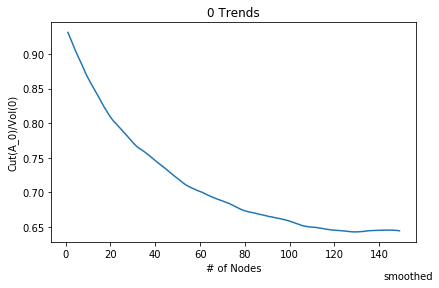

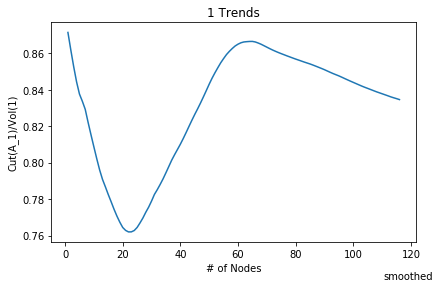

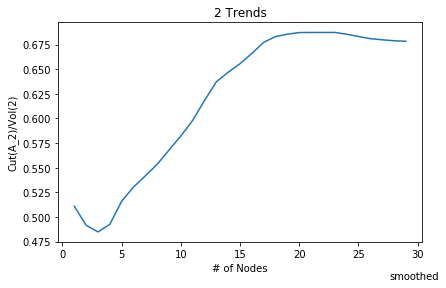

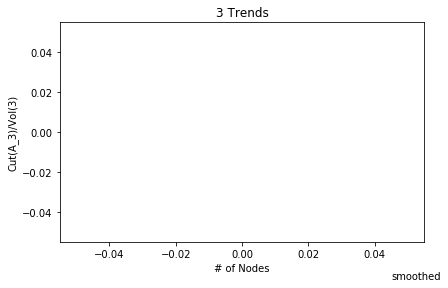

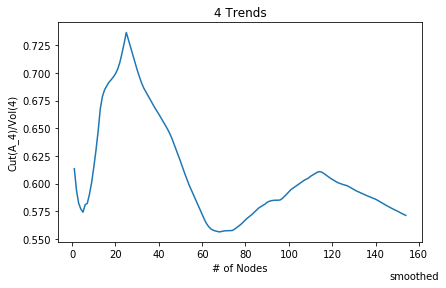

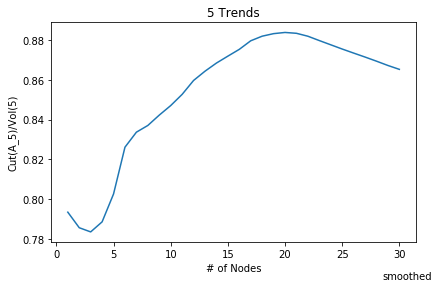

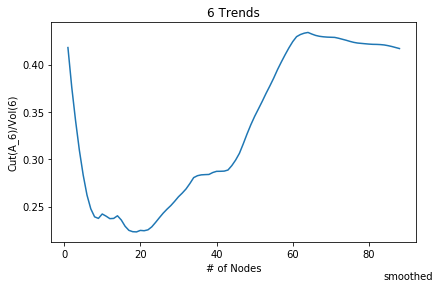

In [116]:
for inst_idx in range(len(smooth_val)):
    # 標題與軸標籤
    plt.title(str(inst_idx)+' Trends')
    plt.xlabel('# of Nodes')
    plt.ylabel('Cut(A_'+str(inst_idx)+')/Vol('+str(inst_idx)+')')
    plt.figtext(0.995, 0.01, 'smoothed', ha='right', va='bottom')
    # 避免被圖表元素被蓋住
    plt.tight_layout()
    plt.plot(range(1,1+len(smooth_val[inst_idx])), smooth_val[inst_idx])
    plt.show()

In [105]:
group_nodes = [None for i in range(len(PPR_sorted))]
for i in range(len(smooth_val)):
    cut = 0
    for j in range(len(smooth_val[i])-1):
        cut += 1
        if smooth_val[i][j] < smooth_val[i][j+1]:
            break
    group_nodes[i] = PPR_sorted[i][0:cut]
group_nodes

[[0,
  28904,
  8116,
  28906,
  13757,
  52163,
  13755,
  92488,
  92489,
  2697,
  52166,
  2703,
  13738,
  28907,
  43603,
  67831,
  47124,
  138145,
  1344,
  67829,
  67830,
  28905,
  48088,
  25266,
  67839,
  48187,
  20698,
  143163,
  43046,
  90777,
  67832,
  34407,
  43474,
  42828,
  99175,
  99174,
  13750,
  13754,
  57565,
  67840,
  110784,
  1343,
  22042,
  143169,
  34225,
  37806,
  13831,
  10399,
  61149,
  48132,
  67844,
  67845,
  67842,
  67843,
  49262,
  140701,
  76699,
  48127,
  67846,
  49261,
  75575,
  43537,
  13746,
  37561,
  43543,
  2696,
  67824,
  67847,
  67856,
  127633,
  16046,
  91939,
  43551,
  13760,
  99166,
  78358,
  90961,
  115316,
  67841,
  23880,
  13747,
  48213,
  30403,
  25269,
  10810,
  13740,
  20403,
  34403,
  38089,
  67816,
  3202,
  48699,
  13752,
  13745,
  3,
  13756,
  37813,
  21350,
  13762,
  57566,
  67833,
  78902,
  13759,
  13751,
  25260,
  13758,
  34115,
  25261,
  68894,
  3404,
  13776,
  43469,
 

In [106]:
#####################
#   最終輸出的分群  #
#####################

[[tran[item] for item in group_nodes[i]] for i in range(len(group_nodes))]

[['Anthony Wong',
  'Dejay Choi',
  'Sandra Ng Kwun-Yu',
  'Zhang Zheng-Zhong',
  'Bobo Chan',
  'Maggie Cheung Hoh-Yee',
  'Francis Ng',
  'Cheung Shui-Chit',
  'Diana Pang',
  'BabyJohn Choi',
  'Sherming Yiu',
  'Jan Lamb',
  'Michael Chan Wai-Man',
  'Yundi Li Yun-Di',
  'Michael Tong',
  'Masato',
  'Dayo Wong',
  'Lee Chun-Wai',
  'Roger Kwok',
  'Endy Chow',
  'Suet-Fei Chiu',
  'Wan Kwong',
  'Crystal Huang Yi',
  'Michael Tse Tin-Wah',
  'Prudence Liew Mei-Kwan',
  'Kay Tse',
  'Ronald Cheng',
  'Sheren Tang',
  'Andrew Lin',
  'Gregory Lee Wing-Ho',
  'Waise Lee',
  'Huang Sheng-Yi',
  'Rain Li',
  'Tainá Müller',
  'Teresa Mo Sun-Kwan',
  'Ha Chun-Chau',
  'Qu Ying',
  'Thomas Hudak',
  'Conroy Chan',
  'Kristal Tin',
  'Jeff Chen',
  'Jo Kuk',
  'Kevin Cheng',
  'Yang Jiang',
  'Samuel Pang',
  'Timmy Hung',
  'Nicola Cheung',
  'Jade Leung',
  'Matt Chow',
  'Wilfred Lau',
  'C Kwan',
  'Stephanie Cheng Yung',
  'Fung Hak-On',
  '6 Wing',
  'You Yong',
  'Yang Liu',
  'Lik